In [1]:
library(ggplot2)
library(tidyr)
library(dplyr)
library(scales)
library(stringr)
library(lubridate)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




In [2]:
#* Read files

In [3]:
df_log <- read.csv(file = 'events.csv', sep = ',', stringsAsFactors = FALSE)
#df_log$creation_timestamp <- as.POSIXct(df_log$creation_timestamp, origin="1970-01-01")
df_log$creation_timestamp <- as.POSIXct(df_log$creation_timestamp,format='%Y-%m-%dT%H:%M:%SZ', tzone = "UTC")
df_log$timestamp <- ymd_hms(df_log$creation_timestamp) + hours(2)
df_log$timestamp[is.na(df_log$timestamp)] <- Inf

df_log <- df_log %>%
  #arrange(creation_timestamp) %>%
  group_by(uid) %>%
  mutate(min_timestamp = min(timestamp)) %>%
  ungroup()
summary(df_log)
str(df_log)
head(df_log)

df_activations <- read.csv(file = 'activations.csv', sep = ',', stringsAsFactors = FALSE)
df_activations$timestamp <- ymd_hms(as.POSIXct(df_activations$timestamp, origin="1970-01-01"))
summary(df_activations)
str(df_activations)

     uid                name           function_name     
 Length:191         Length:191         Length:191        
 Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character  
                                                         
                                                         
                                                         
 creation_timestamp              first_timestamp    last_timestamp    
 Min.   :2023-01-09 13:45:07.0   Length:191         Length:191        
 1st Qu.:2023-01-09 14:02:59.0   Class :character   Class :character  
 Median :2023-01-10 08:53:51.0   Mode  :character   Mode  :character  
 Mean   :2023-01-09 23:39:49.7                                        
 3rd Qu.:2023-01-10 09:11:31.5                                        
 Max.   :2023-01-10 09:37:14.0                                        
    reason              node             message         
 Length:191         Length:191         

tibble [191 × 11] (S3: tbl_df/tbl/data.frame)
 $ uid               : chr [1:191] "2142c3c4-2cde-4411-a05f-85ccadb4ef7d" "2142c3c4-2cde-4411-a05f-85ccadb4ef7d" "2142c3c4-2cde-4411-a05f-85ccadb4ef7d" "2142c3c4-2cde-4411-a05f-85ccadb4ef7d" ...
 $ name              : chr [1:191] "wskowdev-invoker-00-55-guest-facedetection-1" "wskowdev-invoker-00-55-guest-facedetection-1" "wskowdev-invoker-00-55-guest-facedetection-1" "wskowdev-invoker-00-55-guest-facedetection-1" ...
 $ function_name     : chr [1:191] "facedetection_1" "facedetection_1" "facedetection_1" "facedetection_1" ...
 $ creation_timestamp: POSIXct[1:191], format: "2023-01-09 13:45:07" "2023-01-09 13:45:08" ...
 $ first_timestamp   : chr [1:191] "" "2023-01-09T13:45:08Z" "2023-01-09T13:46:21Z" "2023-01-09T13:46:24Z" ...
 $ last_timestamp    : chr [1:191] "" "2023-01-09T13:45:08Z" "2023-01-09T13:46:21Z" "2023-01-09T13:46:24Z" ...
 $ reason            : chr [1:191] "Scheduled" "Pulling" "Pulled" "Created" ...
 $ node              : c

uid                                 
1 2142c3c4-2cde-4411-a05f-85ccadb4ef7d
2 2142c3c4-2cde-4411-a05f-85ccadb4ef7d
3 2142c3c4-2cde-4411-a05f-85ccadb4ef7d
4 2142c3c4-2cde-4411-a05f-85ccadb4ef7d
5 2142c3c4-2cde-4411-a05f-85ccadb4ef7d
6 2142c3c4-2cde-4411-a05f-85ccadb4ef7d
  name                                         function_name  
1 wskowdev-invoker-00-55-guest-facedetection-1 facedetection_1
2 wskowdev-invoker-00-55-guest-facedetection-1 facedetection_1
3 wskowdev-invoker-00-55-guest-facedetection-1 facedetection_1
4 wskowdev-invoker-00-55-guest-facedetection-1 facedetection_1
5 wskowdev-invoker-00-55-guest-facedetection-1 facedetection_1
6 wskowdev-invoker-00-55-guest-facedetection-1 facedetection_1
  creation_timestamp  first_timestamp      last_timestamp       reason   
1 2023-01-09 13:45:07                                           Scheduled
2 2023-01-09 13:45:08 2023-01-09T13:45:08Z 2023-01-09T13:45:08Z Pulling  
3 2023-01-09 13:46:21 2023-01-09T13:46:21Z 2023-01-09T13:46:21Z Pulled   
4 2023-01-09 13:46:24 2023-01-09T13:46:24Z 2023-01-09T13:46:24Z Created  
5 2023-01-09 13:46:24 2023-01-09T13:46:24Z 2023-01-09T13:46:24Z Started  
6 2023-01-09 13:46:25 2023-01-09T13:46:25Z 2023-01-09T13:46:25Z Killing  
  node     
1 tyranitar
2 tyranitar
3 tyranitar
4 tyranitar
5 tyranitar
6 tyranitar
  message                                                                                            
1 Successfully assigned openwhisk/wskowdev-invoker-00-55-guest-facedetection-1 to tyranitar          
2 Pulling image "andersonandrei/python3action:ml_video_face_detection"                               
3 Successfully pulled image "andersonandrei/python3action:ml_video_face_detection" in 1m13.551212536s
4 Created container user-action                                                                      
5 Started container user-action                                                                      
6 Stopping container user-action                                                                     
  timestamp           min_timestamp      
1 2023-01-09 15:45:07 2023-01-09 15:45:07
2 2023-01-09 15:45:08 2023-01-09 15:45:07
3 2023-01-09 15:46:21 2023-01-09 15:45:07
4 2023-01-09 15:46:24 2023-01-09 15:45:07
5 2023-01-09 15:46:24 2023-01-09 15:45:07
6 2023-01-09 15:46:25 2023-01-09 15:45:07

  object_uid        object_name        function_name         duration        
 Length:373         Length:373         Length:373         Min.   :  0.00057  
 Class :character   Class :character   Class :character   1st Qu.:  0.05988  
 Mode  :character   Mode  :character   Mode  :character   Median :  0.17778  
                                                          Mean   : 14.44870  
                                                          3rd Qu.:  4.16726  
                                                          Max.   :180.19065  
                                                          NA's   :233        
   timestamp                         reason          metadata_value    
 Min.   :2023-01-06 10:31:57.00   Length:373         Length:373        
 1st Qu.:2023-01-09 11:06:53.00   Class :character   Class :character  
 Median :2023-01-09 11:59:48.00   Mode  :character   Mode  :character  
 Mean   :2023-01-09 06:48:09.54                                        
 3rd Qu.:2023-01

'data.frame':	373 obs. of  10 variables:
 $ object_uid          : chr  "3e4292f3989a49b08292f3989aa9b08a" "3e4292f3989a49b08292f3989aa9b08a" "3e4292f3989a49b08292f3989aa9b08a" "3e4292f3989a49b08292f3989aa9b08a" ...
 $ object_name         : chr  "facedetection_2" "facedetection_2" "facedetection_2" "facedetection_2" ...
 $ function_name       : chr  "facedetection_2" "facedetection_2" "facedetection_2" "facedetection_2" ...
 $ duration            : num  0.0625 0.0625 0.1293 NA NA ...
 $ timestamp           : POSIXct, format: NA NA ...
 $ reason              : chr  "download_data" "function_execution" "upload_data" "finishing_time" ...
 $ metadata_value      : chr  "" "" "" "" ...
 $ metadata_description: chr  "" "" "" "" ...
 $ node                : logi  NA NA NA NA NA NA ...
 $ message             : logi  NA NA NA NA NA NA ...


In [4]:
#* Scheduling Analysis
#** Filter Data and process data
#*** Events
#**** Filter the events file

In [5]:
df_filtered <- df_log %>%
    filter(
      reason == 'Scheduled' |
      reason == 'Pulling' |
      reason == 'Pulled' |
      reason == 'Created' |
      reason == 'Started' |
      reason == 'Killing')

df_selected <- df_filtered %>%
    select(-name, -uid, -message, -min_timestamp, -first_timestamp, -last_timestamp, -creation_timestamp)
summary(df_selected)

 function_name         reason              node          
 Length:191         Length:191         Length:191        
 Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character  
                                                         
                                                         
                                                         
   timestamp                    
 Min.   :2023-01-09 15:45:07.0  
 1st Qu.:2023-01-09 16:02:59.0  
 Median :2023-01-10 10:53:51.0  
 Mean   :2023-01-10 01:39:49.7  
 3rd Qu.:2023-01-10 11:11:31.5  
 Max.   :2023-01-10 11:37:14.0  

In [6]:
#**** Process the events durations

In [7]:
df_spread <- df_selected %>%
    group_by_at(vars(-timestamp)) %>%
    mutate(sample_id = row_number()) %>% ungroup() %>%
    spread(reason, timestamp) %>%
    select(-sample_id) #%>%

print(df_spread)
df_processed <- df_spread

# A tibble: 37 × 8
   function_…¹ node  Created             Killing             Pulled             
   <chr>       <chr> <dttm>              <dttm>              <dttm>             
 1 chameleon_1 tyra… 2023-01-09 15:54:53 2023-01-09 16:04:57 2023-01-09 15:54:53
 2 chameleon_1 tyra… 2023-01-10 11:03:32 2023-01-10 11:13:35 2023-01-10 11:03:32
 3 chameleon_2 tyra… 2023-01-09 15:56:02 2023-01-09 16:06:04 2023-01-09 15:56:02
 4 chameleon_2 tyra… 2023-01-10 11:04:40 2023-01-10 11:14:43 2023-01-10 11:04:40
 5 facedetect… tyra… 2023-01-09 15:46:24 2023-01-09 15:46:25 2023-01-09 15:46:21
 6 facedetect… tyra… 2023-01-09 16:12:03 2023-01-09 15:46:25 2023-01-09 16:12:03
 7 facedetect… tyra… 2023-01-10 10:55:04 2023-01-09 16:25:52 2023-01-10 10:55:01
 8 facedetect… tyra… 2023-01-10 11:20:31 2023-01-10 10:55:04 2023-01-10 11:20:31
 9 facedetect… tyra… NA                  2023-01-10 11:34:16 NA                 
10 facedetect… tyra… 2023-01-09 15:47:08 2023-01-09 15:59:25 2023-01-09 15:47:08
# … with 

In [8]:
#*** Activations
#**** Filter the activations file

In [9]:
df_activations_selected <- df_activations %>%
    select(
        function_name,
        timestamp,
        reason,
        node,
        object_uid) %>%
    drop_na(timestamp)
        #mutate(duration = (duration / 1000) %% 60)
summary(df_activations_selected)

 function_name        timestamp                         reason         
 Length:158         Min.   :2023-01-06 10:31:57.00   Length:158        
 Class :character   1st Qu.:2023-01-09 11:06:53.00   Class :character  
 Mode  :character   Median :2023-01-09 11:59:48.00   Mode  :character  
                    Mean   :2023-01-09 06:48:09.54                     
                    3rd Qu.:2023-01-09 15:08:14.75                     
                    Max.   :2023-01-10 10:27:14.00                     
   node          object_uid       
 Mode:logical   Length:158        
 NA's:158       Class :character  
                Mode  :character  
                                  
                                  
                                  

In [10]:
#**** Spread the timestamps of activations by categories

In [11]:
df_activations_selected <- df_activations %>%
    select(
       function_name,
       timestamp,
       reason) %>%
    drop_na()
    #mutate(duration = (duration / 1000) %% 60)
summary(df_activations_selected)

df_spread_activations <- df_activations_selected %>%
   group_by_at(vars(-timestamp)) %>%
   mutate(sample_id = row_number()) %>% ungroup() %>%
   spread(reason, timestamp) %>%
   select(-sample_id)

head(df_spread_activations)
tail(df_spread_activations)

 function_name        timestamp                         reason         
 Length:158         Min.   :2023-01-06 10:31:57.00   Length:158        
 Class :character   1st Qu.:2023-01-09 11:06:53.00   Class :character  
 Mode  :character   Median :2023-01-09 11:59:48.00   Mode  :character  
                    Mean   :2023-01-09 06:48:09.54                     
                    3rd Qu.:2023-01-09 15:08:14.75                     
                    Max.   :2023-01-10 10:27:14.00                     

function_name finishing_time      starting_time      
1 chameleon     2023-01-09 11:31:23 2023-01-09 11:31:20
2 chameleon     2023-01-09 11:30:20 2023-01-09 11:30:17
3 chameleon     2023-01-06 11:29:23 2023-01-06 11:29:23
4 chameleon_1   2023-01-10 10:03:35 2023-01-10 10:03:33
5 chameleon_1   2023-01-09 14:54:57 2023-01-09 14:54:55
6 chameleon_1   2023-01-09 11:51:46 2023-01-09 11:51:44

function_name     finishing_time      starting_time      
1 videoprocessing_1 2023-01-09 11:55:04 2023-01-09 11:53:58
2 videoprocessing_1 2023-01-09 10:42:07 2023-01-09 10:41:04
3 videoprocessing_2 2023-01-10 10:09:16 2023-01-10 10:08:01
4 videoprocessing_2 2023-01-09 15:00:44 2023-01-09 14:59:24
5 videoprocessing_2 2023-01-09 11:57:28 2023-01-09 11:56:11
6 videoprocessing_2 2023-01-09 10:44:25 2023-01-09 10:43:11

In [12]:
#** Merge the activations and events data

In [13]:
# That occurs some error with imageprocessing2 from Kubernetes side, it was not registered its node.
# df_spread_activations <- df_spread_activations %>% filter(function_name != 'imageprocessing2')


In [14]:
df_events_to_join <- df_processed #%>% mutate(id = row_number())
head(df_events_to_join)
df_activations_to_join <- df_spread_activations #%>% mutate(id = row_number())
head(df_activations_to_join)

df_all <- full_join(
   df_events_to_join,
   df_activations_to_join,
   by="function_name") #%>%
   #distinct()
#df_all[is.na(df_all)] = 0
summary(df_all)

df_gathered <- df_all %>%
    gather(
        factor_key = 'TRUE',
        key = 'reason',
        value = 'timestamp',
        -function_name, -node)

df_gathered$reason <- str_replace_all(df_gathered$reason, 'Scheduled', '00_pod_scheduled')
df_gathered$reason <- str_replace_all(df_gathered$reason, 'Pulling', '01_container_pulling')
df_gathered$reason <- str_replace_all(df_gathered$reason, 'Pulled', '02_container_pulled')
df_gathered$reason <- str_replace_all(df_gathered$reason, 'Created', '03_container_created')
df_gathered$reason <- str_replace_all(df_gathered$reason, 'Started', '04_container_started')
df_gathered$reason <- str_replace_all(df_gathered$reason, 'starting_time', '05_function_started')
df_gathered$reason <- str_replace_all(df_gathered$reason, 'finishing_time', '06_function_finished')
df_gathered$reason <- str_replace_all(df_gathered$reason, 'Killing', '07_finishing_container')

head(df_gathered)
summary(df_gathered)

function_name   node      Created             Killing            
1 chameleon_1     tyranitar 2023-01-09 15:54:53 2023-01-09 16:04:57
2 chameleon_1     tyranitar 2023-01-10 11:03:32 2023-01-10 11:13:35
3 chameleon_2     tyranitar 2023-01-09 15:56:02 2023-01-09 16:06:04
4 chameleon_2     tyranitar 2023-01-10 11:04:40 2023-01-10 11:14:43
5 facedetection_1 tyranitar 2023-01-09 15:46:24 2023-01-09 15:46:25
6 facedetection_1 tyranitar 2023-01-09 16:12:03 2023-01-09 15:46:25
  Pulled              Pulling             Scheduled          
1 2023-01-09 15:54:53 2023-01-09 15:54:46 2023-01-09 15:54:46
2 2023-01-10 11:03:32 2023-01-10 11:03:25 2023-01-10 11:03:24
3 2023-01-09 15:56:02 <NA>                2023-01-09 15:56:01
4 2023-01-10 11:04:40 <NA>                2023-01-10 11:04:39
5 2023-01-09 15:46:21 2023-01-09 15:45:08 2023-01-09 15:45:07
6 2023-01-09 16:12:03 2023-01-09 16:12:00 2023-01-09 16:12:00
  Started            
1 2023-01-09 15:54:54
2 2023-01-10 11:03:32
3 2023-01-09 15:56:02
4 2023-01-10 11:04:40
5 2023-01-09 15:46:24
6 2023-01-09 16:12:04

function_name finishing_time      starting_time      
1 chameleon     2023-01-09 11:31:23 2023-01-09 11:31:20
2 chameleon     2023-01-09 11:30:20 2023-01-09 11:30:17
3 chameleon     2023-01-06 11:29:23 2023-01-06 11:29:23
4 chameleon_1   2023-01-10 10:03:35 2023-01-10 10:03:33
5 chameleon_1   2023-01-09 14:54:57 2023-01-09 14:54:55
6 chameleon_1   2023-01-09 11:51:46 2023-01-09 11:51:44

 function_name          node              Created                      
 Length:181         Length:181         Min.   :2023-01-09 15:46:24.00  
 Class :character   Class :character   1st Qu.:2023-01-09 16:01:15.50  
 Mode  :character   Mode  :character   Median :2023-01-10 01:35:59.00  
                                       Mean   :2023-01-10 01:34:53.00  
                                       3rd Qu.:2023-01-10 11:08:37.25  
                                       Max.   :2023-01-10 11:25:17.00  
                                       NA's   :37                      
    Killing                          Pulled                      
 Min.   :2023-01-09 15:46:25.0   Min.   :2023-01-09 15:46:21.00  
 1st Qu.:2023-01-09 16:10:44.0   1st Qu.:2023-01-09 16:01:15.50  
 Median :2023-01-10 10:55:04.0   Median :2023-01-10 01:35:57.50  
 Mean   :2023-01-10 02:08:55.7   Mean   :2023-01-10 01:34:52.72  
 3rd Qu.:2023-01-10 11:19:16.0   3rd Qu.:2023-01-10 11:08:37.00  
 Max.   :2023-01-10 11:37:14

function_name node      reason               timestamp          
1 chameleon_1   tyranitar 03_container_created 2023-01-09 15:54:53
2 chameleon_1   tyranitar 03_container_created 2023-01-09 15:54:53
3 chameleon_1   tyranitar 03_container_created 2023-01-09 15:54:53
4 chameleon_1   tyranitar 03_container_created 2023-01-10 11:03:32
5 chameleon_1   tyranitar 03_container_created 2023-01-10 11:03:32
6 chameleon_1   tyranitar 03_container_created 2023-01-10 11:03:32

 function_name          node              reason         
 Length:1448        Length:1448        Length:1448       
 Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character  
                                                         
                                                         
                                                         
                                                         
   timestamp                    
 Min.   :2023-01-06 10:31:57.0  
 1st Qu.:2023-01-09 15:46:21.0  
 Median :2023-01-09 16:10:52.0  
 Mean   :2023-01-09 21:42:31.7  
 3rd Qu.:2023-01-10 11:03:32.0  
 Max.   :2023-01-10 11:37:14.0  
 NA's   :279                    

In [15]:
#** Plot the merged data

 function_name          node              reason         
 Length:1169        Length:1169        Length:1169       
 Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character  
                                                         
                                                         
                                                         
   timestamp                    
 Min.   :2023-01-06 10:31:57.0  
 1st Qu.:2023-01-09 15:46:21.0  
 Median :2023-01-09 16:10:52.0  
 Mean   :2023-01-09 21:42:31.7  
 3rd Qu.:2023-01-10 11:03:32.0  
 Max.   :2023-01-10 11:37:14.0  

Warning message:
“Removed 40 rows containing missing values (geom_point).”
Saving 6.67 x 6.67 in image

Warning message:
“Removed 40 rows containing missing values (geom_point).”
Warning message:
“The shape palette can deal with a maximum of 6 discrete values because
more than 6 becomes difficult to discriminate; you have 8. Consider
specifying shapes manually if you must have them.”
Warning message:
“Removed 342 rows containing missing values (geom_point).”


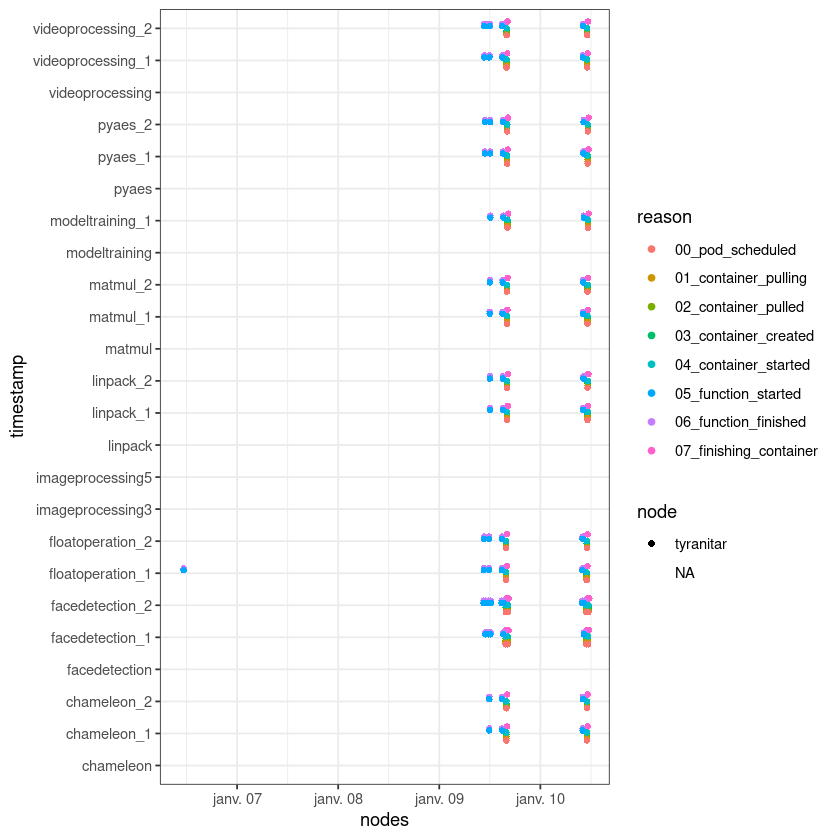

Saving 6.67 x 6.67 in image

Warning message:
“The shape palette can deal with a maximum of 6 discrete values because
more than 6 becomes difficult to discriminate; you have 8. Consider
specifying shapes manually if you must have them.”
Warning message:
“Removed 342 rows containing missing values (geom_point).”


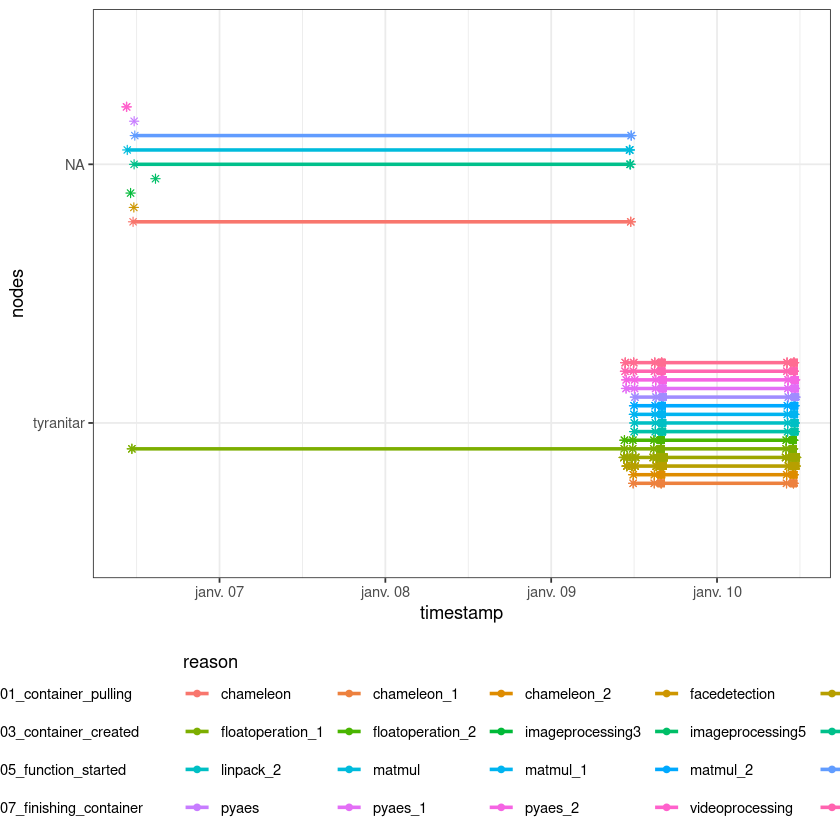

Saving 6.67 x 6.67 in image



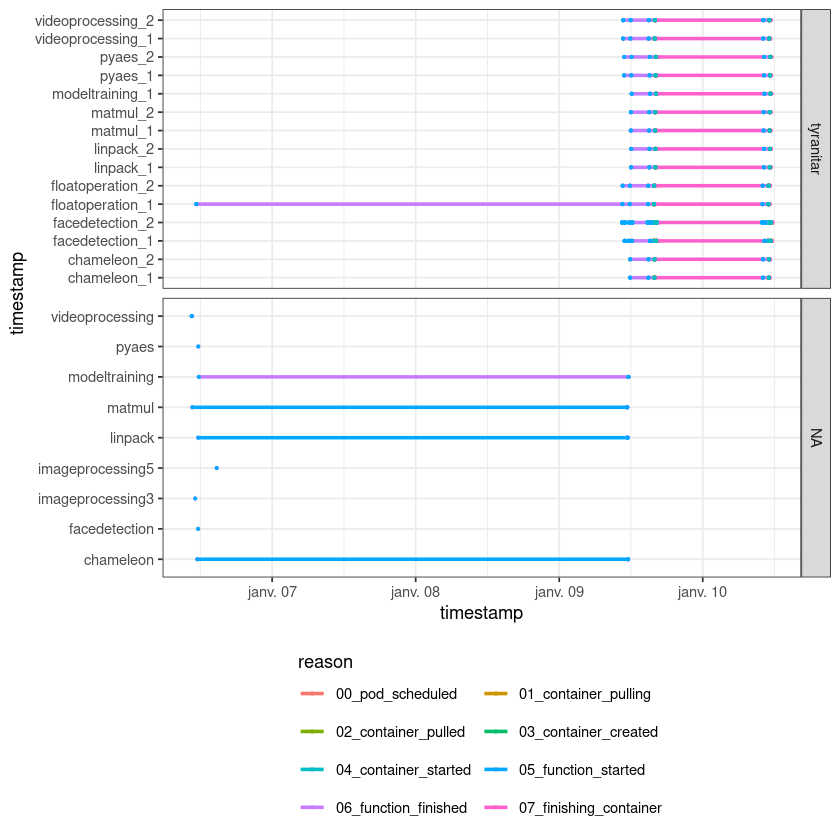

In [16]:
df_plot <- df_gathered %>% drop_na(timestamp)
summary(df_plot)

ggplot(data = df_plot, aes(x = timestamp,
                           y = function_name,
                           color = reason,
                           shape = node)) +
                           #group = function_name)) + #, color = node)) +
    #geom_line(size = 1, position = position_dodge(width = 0.5)) +
    geom_point(position = position_dodge(width = 0.5)) +
    #coord_flip() +
    labs(x = "nodes", y = "timestamp", color = "reason") +
       scale_fill_brewer(palette = "Dark2") +
       theme_bw() +
       theme(legend.position="right")
       ggsave('full_line_plot_phases.png')

ggplot(data = df_plot, aes(x = node,
                           y = timestamp,
                           color = function_name,
                           shape = reason,
                           group = function_name)) + #, color = node)) +
    geom_line(size = 1, position = position_dodge(width = 0.5)) +
    geom_point(position = position_dodge(width = 0.5)) +
    coord_flip() +
    labs(x = "nodes", y = "timestamp", color = "reason") +
       scale_fill_brewer(palette = "Dark2") +
       theme_bw() +
       theme(legend.position="bottom") +
    guides(colour=guide_legend(nrow=4,byrow=TRUE, title.position = "top"),
           shape=guide_legend(nrow=4,byrow=TRUE, title.position = "top"))
    ggsave('full_line_plot_phases_nodes.png')

ggplot(data = df_plot, aes(x = timestamp,
                           y = function_name,
                           color = reason,
                           group = function_name)) + #, color = node)) +
    geom_line(size = 1, position = position_dodge(width = 0.7)) +
    geom_point(size = 0.5, position = position_dodge(width = 0.7)) +
    facet_grid(node ~ ., scale="free_y") +
    labs(x = "timestamp", y = "timestamp", color = "reason") +
    scale_fill_brewer(palette = "Dark2") +
    theme_bw() +
    theme(legend.position="bottom") +
    guides(colour=guide_legend(nrow=4,byrow=TRUE, title.position = "top"))
    ggsave('full_line_plot_phases_facets.png')